In [1]:
import os
os.sys.path.append(os.path.join(os.getcwd(), "../.."))
import matplotlib.pyplot as plt
from databases.connector import Connector
from models.ExportFormat import ExportFormat
from utils.helpers import write_roman

In [2]:
connector = Connector(ExportFormat.JSON)

In [3]:
legislature_count = {
	7: 0,
	8: 0,
	9: 0,
	10: 0,
	11: 0,
	12: 0,
	13: 0,
	14: 0,
	15: 0,
	16: 0,
}

total = 0

for legislature_number in range(7,17):
	questions = connector.client.aggregate_questions(
		[{"$match": {"id": {"$regex": f"{legislature_number}-"}}}]
	)
	questions_list = len(list(questions))
	total += questions_list
	legislature_count[legislature_number] = questions_list

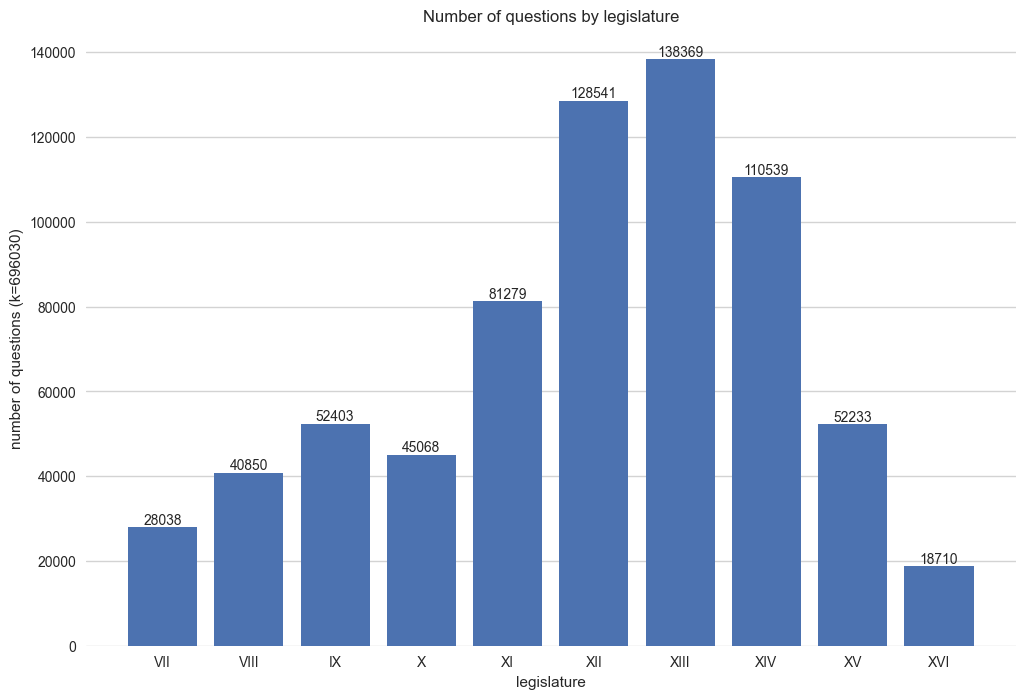

In [4]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 8))
plt.gca().set_facecolor((1.0, 1.0, 1.0))
plt.title('Number of questions by legislature')
plt.xlabel('legislature')
plt.ylabel(f'number of questions (k={total})')
plt.grid(axis="y", color="lightgrey")

bars = plt.bar(x=[write_roman(x) for x in legislature_count.keys()], height=legislature_count.values())

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.show()